In [58]:
# Odevi iki sekilde cozdum. Birinci cozumumde split yapmadan 
# decision tree classifier ile %82 basari sagladim.

# Ikinci cozumde ise kodun bos verileri regresyon ile tahmin
#etme kismini Tugba Kayhan`in kodundan aldim. Uzerine degisiklik
# yaparak teslim ediyorum. Ikinci cozumde de %82, datayi
#split ederek basari sagladim.

import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#plt.style.use('')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("LoansTrainingSet.csv")

In [3]:
#EDA - Exporatory Data Analysis

In [4]:
df.sample(100)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
170940,a9fe10e5-ce0b-41da-81ff-bbd7858fcdf8,9417270c-5f89-4304-8c7c-f214e989f6fe,Fully Paid,7994,Short Term,723.0,10+ years,Home Mortgage,55961.0,Debt Consolidation,"$1,436.32",13.8,57.0,12,0,18422,20699,0.0,0.0
210581,d18a1ec5-a51f-4f2a-85b9-79465de3b7f4,1f053aea-189e-4cfe-9d51-57b707d0f418,Fully Paid,14126,Short Term,731.0,< 1 year,Rent,80720.0,Debt Consolidation,$221.98,10.6,35.0,10,0,7149,12116,0.0,0.0
139328,8aa3e895-ecac-4dc3-be7e-1bd4be8ba051,9d856930-31ee-4090-9e44-364d84e265b3,Charged Off,14900,Short Term,7240.0,10+ years,Own Home,49665.0,Debt Consolidation,"$1,105.05",20.2,NaN,18,0,30653,43604,0.0,0.0
241683,f0a5b826-6bc6-440c-be2d-a9a908ffd12f,6a581180-f91c-44eb-ae1d-fd428f8942fa,Fully Paid,6090,Short Term,732.0,4 years,Home Mortgage,131950.0,Debt Consolidation,"$2,606.01",18.2,8.0,15,1,37524,59751,1.0,0.0
62833,3e824c5d-a227-474b-816f-a0c90e135c34,1f3fe3d9-ae60-410f-bdd6-cc469db28b1d,Fully Paid,14139,Long Term,666.0,9 years,Home Mortgage,71182.0,other,$806.73,12.6,9.0,10,0,2627,7505,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,0c53b892-2cbe-4938-8f6f-f3d126376875,d85a7eeb-401b-4f3a-9fd3-3842e65d2ec6,Charged Off,10217,Short Term,724.0,7 years,Rent,57215.0,Debt Consolidation,$385.72,10.2,NaN,11,0,11856,18381,0.0,0.0
52595,344e3af7-8478-470b-acfc-dedb56136af7,9df4df95-f191-42e2-89d3-27c7a36a657d,Charged Off,5061,Short Term,7380.0,1 year,Rent,12068.0,Debt Consolidation,$239.35,27.4,19.0,8,0,5800,28713,0.0,0.0
24611,18a2b540-0192-4354-8c47-6950218dfa6f,3fd074c8-e704-4df3-897d-1c53a247d3db,Fully Paid,16013,Short Term,712.0,6 years,Home Mortgage,50120.0,Business Loan,$927.22,11.9,NaN,12,0,16105,26663,0.0,0.0
190011,bceda918-4cf9-48e6-a506-56dfff3e9779,8dc18f24-900b-41f0-90fa-8aa6ad424e8a,Fully Paid,11120,Long Term,691.0,10+ years,Rent,66223.0,Debt Consolidation,$695.34,17.6,10.0,11,0,14560,18788,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [6]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [7]:
df.columns= df.columns.str.lower()

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format) # display format
df.describe()

,current loan amount,credit score,annual income,years of credit history,months since last delinquent,number of open accounts,number of credit problems,current credit balance,bankruptcies,tax liens
count,256984.00,195308.00,195308.00,256984.00,116601.00,256984.00,256984.00,256984.00,256455.00,256961.00
mean,13713306.26,1251.12,71952.72,18.29,34.88,11.11,0.16,15406.56,0.11,0.03
std,34381306.57,1762.02,58877.57,7.08,21.85,4.98,0.46,19665.06,0.34,0.25
min,505.00,585.00,0.00,3.40,0.00,0.00,0.00,0.00,0.00,0.00
25%,8299.00,714.00,44321.00,13.50,16.00,8.00,0.00,5974.00,0.00,0.00
50%,14298.00,733.00,61242.00,17.00,32.00,10.00,0.00,11078.00,0.00,0.00
75%,24367.00,744.00,86462.00,21.70,51.00,14.00,0.00,19319.00,0.00,0.00
max,99999999.00,7510.00,8713547.00,70.50,176.00,76.00,11.00,1731412.00,7.00,11.00


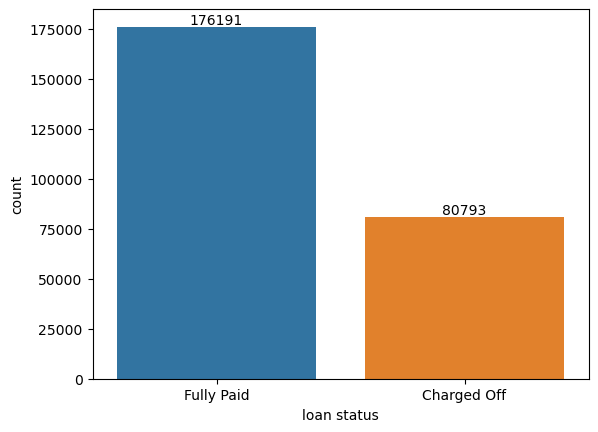

In [9]:
df["loan status"].value_counts()
ax=sns.countplot(x=df["loan status"])
ax.bar_label(ax.containers[0]);


In [10]:
df['home ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [11]:
df['home ownership'].replace('HaveMortgage', 'Home Mortgage', inplace=True)

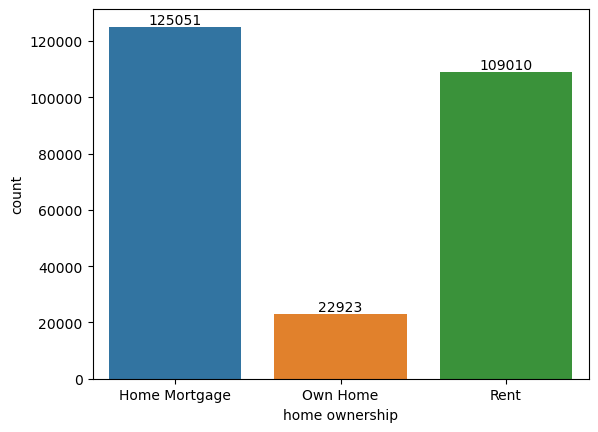

In [12]:
ax=sns.countplot(x=df["home ownership"])
ax.bar_label(ax.containers[0]);

In [13]:
df['purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [14]:
df['purpose'].replace('other', 'Other', inplace=True)

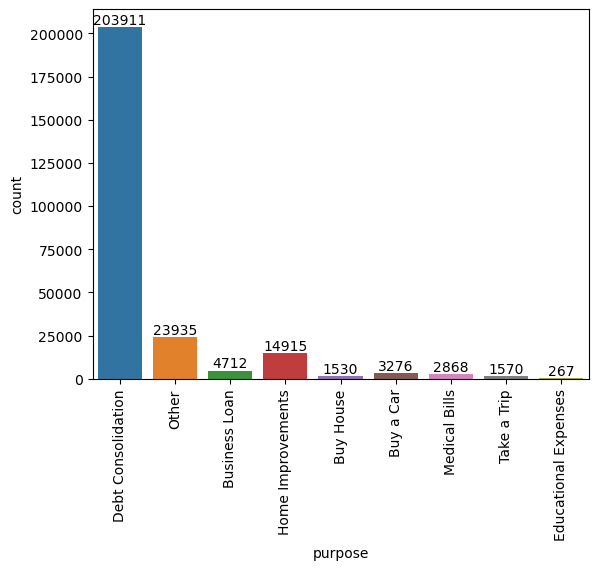

In [15]:
ax=sns.countplot(x=df["purpose"])
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0]);

In [16]:
df.columns

Index(['loan id', 'customer id', 'loan status', 'current loan amount', 'term',
       'credit score', 'years in current job', 'home ownership',
       'annual income', 'purpose', 'monthly debt', 'years of credit history',
       'months since last delinquent', 'number of open accounts',
       'number of credit problems', 'current credit balance',
       'maximum open credit', 'bankruptcies', 'tax liens'],
      dtype='object')

In [17]:
df['credit score'].max(), df['credit score'].min(), df['credit score'].mean()

(7510.0, 585.0, 1251.1160986749135)

In [18]:
maxscore = 850 #domain knowledge
#df['credit score'].where(df['credit score'] <= maxVal, maxVal) 
df['credit score'][df['credit score'] >= maxscore] = maxscore

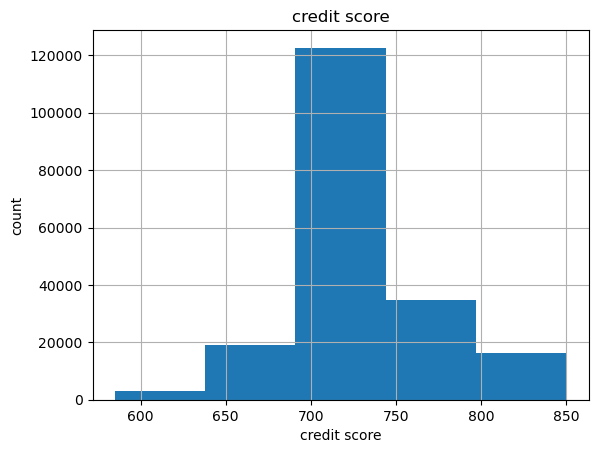

In [19]:
axarr = df.hist(column='credit score', bins=5);
for ax in axarr.flatten():
    ax.set_xlabel("credit score")
    ax.set_ylabel("count")

In [20]:
df['credit score'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
256979     True
256980    False
256981    False
256982    False
256983    False
Name: credit score, Length: 256984, dtype: bool

In [21]:
df["years in current job"].value_counts()

10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: years in current job, dtype: int64

In [22]:
#df = df.replace('< 1 year', 0)
#df['years in current job'] = df['years in current job'].str.replace(r'(\byear\b|\+|years)', '', regex=True)
#df['years in current job'] = df['years in current job'].astype(float)

In [23]:
#df['years in current job'] = df['years in current job'].str.extract('(\d+)', expand=False)
#df['years in current job'] = df['years in current job'].fillna( ( df['years in current job'].mean() ) )

In [24]:
#df.replace = df.replace('< 1 year', 0)
df['years in current job'] = df['years in current job'].str.replace('\D', '', regex=True)
nan_index = df.loc[pd.isna(df["years in current job"]), :].index
df2 = df.drop(nan_index)
df2['years in current job'] = df2['years in current job'].astype(float)
df['years in current job'] = df['years in current job'].fillna( ( df2['years in current job'].mean() ) )
df['years in current job'] = df['years in current job'].astype(int)

In [25]:
df['years in current job'].unique()

array([10,  4,  6,  5,  3,  2,  1,  7,  9,  8])

In [26]:
df.isnull().sum()

loan id                              0
customer id                          0
loan status                          0
current loan amount                  0
term                                 0
credit score                     61676
years in current job                 0
home ownership                       0
annual income                    61676
purpose                              0
monthly debt                         0
years of credit history              0
months since last delinquent    140383
number of open accounts              0
number of credit problems            0
current credit balance               0
maximum open credit                  0
bankruptcies                       529
tax liens                           23
dtype: int64

In [27]:
df["tax liens"].value_counts()

0.00     252322
1.00       3276
2.00        872
3.00        247
4.00        124
5.00         61
6.00         30
9.00         10
8.00          8
7.00          6
10.00         3
11.00         2
Name: tax liens, dtype: int64

In [28]:
# since the great majority has no tax liens, I fill missing 23 values with 0.
df['tax liens'].fillna(0, inplace=True)

In [29]:
# bankrupcy null degerleri
#x = np.where((x < 5) | (x > 8), x/2, x)

df['bankruptcies'] = np.where((df['credit score'] <= 650) & (df['bankruptcies'].isnull() ) , 1, df['bankruptcies'] ) 
df['bankruptcies'] = np.where((df['credit score'] > 650) & (df['bankruptcies'].isnull()), 0, df['bankruptcies'] )



In [30]:
# payment status is converted to 1 and 0. 1 paid, 0 unpaid

d = {'Fully Paid':1, 'Charged Off':0 }
df["payment status"] = df["loan status"].map(d)

In [31]:
#if paid, bankrupties 0, if unpaid bankrupties 1
df['bankruptcies'] = np.where((df['payment status'] == 1) & (df['bankruptcies'].isnull()), 0, df['bankruptcies'] )
df['bankruptcies'] = np.where((df['payment status'] == 0) & (df['bankruptcies'].isnull()), 1, df['bankruptcies'] )


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan id                       256984 non-null  object 
 1   customer id                   256984 non-null  object 
 2   loan status                   256984 non-null  object 
 3   current loan amount           256984 non-null  int64  
 4   term                          256984 non-null  object 
 5   credit score                  195308 non-null  float64
 6   years in current job          256984 non-null  int32  
 7   home ownership                256984 non-null  object 
 8   annual income                 195308 non-null  float64
 9   purpose                       256984 non-null  object 
 10  monthly debt                  256984 non-null  object 
 11  years of credit history       256984 non-null  float64
 12  months since last delinquent  116601 non-nul

In [33]:
df['monthly debt'] = df['monthly debt'].str.replace(',', '')
df['monthly debt'] = df['monthly debt'].str.replace('$', '')
df['monthly debt'] = df['monthly debt'].astype(float)

df = df.replace('#VALUE!', 0)
df['maximum open credit'] = df['maximum open credit'].astype(float)

df['months since last delinquent'] = df['months since last delinquent'].fillna(0)

In [34]:
# Manipulating the dummy variables

dummy_df = pd.get_dummies(df["term"], prefix="term", drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

dummy_df = pd.get_dummies(df["purpose"], prefix="purpose", drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

dummy_df = pd.get_dummies(df["home ownership"], prefix="home ownership", drop_first=True)
df = pd.concat([df, dummy_df], axis=1)




In [35]:
df.sample(100)
#df["current loan amount"].value_counts()

,loan id,customer id,loan status,current loan amount,term,credit score,years in current job,home ownership,annual income,purpose,monthly debt,years of credit history,months since last delinquent,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens,payment status,term_Short Term,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip,home ownership_Own Home,home ownership_Rent
134857,861e4bfd-711d-4093-8e35-8eb79677e55a,4a04ad7c-ab7f-405e-8307-5937652ba15f,Fully Paid,6087,Short Term,727.00,8,Home Mortgage,99421.00,Take a Trip,1599.02,35.90,12.00,11,0,14607,22823.00,0.00,0.00,1,1,0,0,0,0,0,0,0,1,0,0
121614,78d91ce0-e780-4731-a391-e3bda3f1567f,23c085d4-da83-4ca9-a5a1-55ca4d1c733b,Fully Paid,19618,Long Term,656.00,10,Home Mortgage,66701.00,Debt Consolidation,928.26,40.60,42.00,8,0,16691,20890.00,0.00,0.00,1,0,0,0,1,0,0,0,0,0,0,0
14024,0e0211f0-0fe7-4e42-829d-d2dfdddf1b71,de644ade-d364-40f1-9469-95a04506b194,Charged Off,16364,Long Term,NaN,10,Own Home,NaN,Debt Consolidation,892.01,16.70,0.00,12,0,10810,15120.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,1,0
148424,9389f581-95fc-444f-8ef6-5b5188316068,8da18fe9-f13b-4273-ac87-35206bf8984b,Fully Paid,14708,Long Term,697.00,3,Home Mortgage,66674.00,Debt Consolidation,457.82,12.20,57.00,10,0,4946,16879.00,0.00,0.00,1,0,0,0,1,0,0,0,0,0,0,0
172617,ab966812-933d-46ea-8410-b1d22f61322e,2dee1f71-c58f-40b5-bcc6-680ac25e62dc,Fully Paid,99999999,Short Term,736.00,10,Home Mortgage,99590.00,Debt Consolidation,2074.79,12.00,0.00,13,0,55918,63112.00,0.00,0.00,1,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75190,4aa6c3f8-5418-4dd6-bea2-f1dd463f22a3,37bab045-0ef1-4ec6-9ddd-2170a3f67bda,Fully Paid,5434,Short Term,NaN,3,Rent,NaN,Debt Consolidation,393.46,20.90,36.00,10,1,9127,12073.00,1.00,0.00,1,1,0,0,1,0,0,0,0,0,0,1
164873,a4056cab-5afb-47ba-90a1-7752419a1ee7,780b64a5-0358-46aa-9aab-cec39ac1a674,Charged Off,22551,Long Term,674.00,6,Rent,56379.00,Debt Consolidation,1230.93,13.20,0.00,12,0,12587,24021.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,1
25178,192c46f1-282a-4d6a-8ccd-903043c8c215,d59e6a23-35e2-4bd9-9859-93d6e2cce33e,Fully Paid,5701,Short Term,737.00,3,Own Home,36648.00,Debt Consolidation,403.13,9.10,0.00,5,0,4960,9880.00,0.00,0.00,1,1,0,0,1,0,0,0,0,0,1,0
96435,5fec4d3b-8f90-49c5-af05-bdb4ff7c4ca5,b26d2908-53b7-4d4b-874c-8bfc555f8cd5,Fully Paid,99999999,Short Term,671.00,10,Home Mortgage,79178.00,Debt Consolidation,1088.69,13.20,72.00,16,0,13915,26967.00,0.00,0.00,1,1,0,0,1,0,0,0,0,0,0,0


In [36]:
## annual ıncome predıctıon
y = df['annual income']

predict_column = 'annual income'

features = ["payment status", "current loan amount","term_Short Term", "monthly debt",
        "months since last delinquent", "number of credit problems", "current credit balance", 
         "maximum open credit", "bankruptcies","home ownership_Rent", "home ownership_Own Home"]

test_indices = df[df[predict_column].isnull()].index
test_df = df.loc[test_indices]

train_df = df.drop(test_indices)

x_train = train_df[features]
y_train = train_df[predict_column]

x_test = test_df[features]

x_train.shape,x_test.shape,y_train.shape


((195308, 11), (61676, 11), (195308,))

In [54]:
df['tax liens'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: tax liens
Non-Null Count   Dtype  
--------------   -----  
256984 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [37]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

y_pred_xgb = model.predict(x_test)
df.loc[df['annual income'].isnull(), 'annual income'] = y_pred_xgb

In [38]:
df['annual income'].isnull().sum()

0

In [39]:
df["loan status"]

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4          Fully Paid
             ...     
256979     Fully Paid
256980     Fully Paid
256981    Charged Off
256982    Charged Off
256983     Fully Paid
Name: loan status, Length: 256984, dtype: object

In [40]:
## annual ıncome predıctıon
y = df['credit score']

predict_column = 'credit score'

features = ["payment status", "current loan amount","term_Short Term", "monthly debt",
        "months since last delinquent", "number of credit problems", "current credit balance", 
         "maximum open credit", "bankruptcies","home ownership_Rent", "home ownership_Own Home"]

test_indices = df[df[predict_column].isnull()].index
test_df = df.loc[test_indices]

train_df = df.drop(test_indices)

x_train = train_df[features]
y_train = train_df[predict_column]

x_test = test_df[features]

x_train.shape,x_test.shape,y_train.shape

((195308, 11), (61676, 11), (195308,))

In [41]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

y_pred_xgb = model.predict(x_test)
df.loc[df['credit score'].isnull(), 'credit score'] = y_pred_xgb

In [44]:
df['credit score'].isnull().sum()

0

In [53]:
x = df[ [ 'current loan amount', 
       'credit score', 'years in current job',
       'annual income', 'monthly debt', 'years of credit history',
       'months since last delinquent', 'number of open accounts',
       'number of credit problems', 'current credit balance',
       'maximum open credit', 'bankruptcies', 'tax liens',
       'term_Short Term', 'purpose_Buy House', 'purpose_Buy a Car',
       'purpose_Debt Consolidation', 'purpose_Educational Expenses',
       'purpose_Home Improvements', 'purpose_Medical Bills', 'purpose_Other',
       'purpose_Take a Trip', 'home ownership_Own Home',
       'home ownership_Rent'] ]
y = df['payment status']

In [59]:
def algo_test(x,y):
    
    
    G = GaussianNB()
    B = BernoulliNB()
    K = KNeighborsClassifier()
    L = LogisticRegression()
    D = DecisionTreeClassifier()
    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 13)
    
    algos = [G,B,K,L,D]
    
    algo_names = [ "Gaussian", "Bernoulli", "K-Neighbors", "Logistic Regression", "Decision Tree" ]
    
    ASC = [];
    
    result =  result = pd.DataFrame(columns =['Accuracy_Score'], index = algo_names)
    
    i = 0;
    for algo in algos :
        
        algo.fit(x_train,y_train)
        #print (accuracy_score(  y_test, algo.predict(x_test) ))
        ASC.append(  accuracy_score(  y_test, algo.predict(x_test) ) )
        
        print( "Confusion matrix: ",format(algo_names[i]) )
        i = i+1;
        print ( confusion_matrix(algo.predict(x_test),y_test) )
        
        #algo.fit(x,y)
        #print (accuracy_score(  y, algo.predict(x) ))
        #ASC.append(  accuracy_score(  y, algo.predict(x) ) )
    
    
    result.Accuracy_Score = ASC;

    return result.sort_values('Accuracy_Score', ascending=False)
    
 

In [60]:
algo_test(x,y)

Confusion matrix:  Gaussian
[[16073 28176]
 [   14  7134]]
Confusion matrix:  Bernoulli
[[ 1301  1158]
 [14786 34152]]
Confusion matrix:  K-Neighbors
[[ 7253  6828]
 [ 8834 28482]]
Confusion matrix:  Logistic Regression
[[  451   329]
 [15636 34981]]
Confusion matrix:  Decision Tree
[[12372  5577]
 [ 3715 29733]]


,Accuracy_Score
Decision Tree,0.82
K-Neighbors,0.70
Bernoulli,0.69
Logistic Regression,0.69
Gaussian,0.45
